<a href="https://colab.research.google.com/github/Darkunquie/chatbot-using-NLP/blob/main/ChatBot_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##extract the text from the file


In [8]:
import json

with open('/content/Chatbot.ipynb', 'r') as f:
    notebook_data = json.load(f)

code_cells = [cell['source'] for cell in notebook_data['cells'] if cell['cell_type'] == 'code']
extracted_code = [''.join(lines) for lines in code_cells]

# Save the extracted code to a new file
with open('extracted_code.py', 'w') as outfile:  # Specify the desired output filename
    for code_block in extracted_code:
        outfile.write(code_block + '\n')  # Write each code block and add a newline

print("Extracted code saved to extracted_code.py") #Optional: Print a confirmation message

Extracted code saved to extracted_code.py


In [10]:
!pip install nlp_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 2.3 MB/s eta 0:00:00


In [11]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

In [12]:
f = open("dialogs.txt", "r")
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [13]:
# reading the data
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))

In [14]:
# Reading the data
df

Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response  
0                         i'm fine. how about yourself?  
1                   i'm pretty good. thanks for asking.  
2                     no problem. so how have you been?  
3                      i've been great. what about you?  
4              i've been good. i'm in school right now.  
...                                                 ...  
3720                              are you right-handed?  
3721                                  yes. all my life.  
3722  you're wearing out your right hand. stop using...  
3723        but i do all my writing with my right hand.  
3724  start typing instead. that way your left hand ...  

[3725 rows x 2 columns]

In [15]:
df.shape

(3725, 2)

In [16]:
df.columns


Index(['Query', 'Response'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


Query           Response
count                3725               3725
unique               3510               3512
top     what do you mean?  what do you mean?
freq                   22                 22

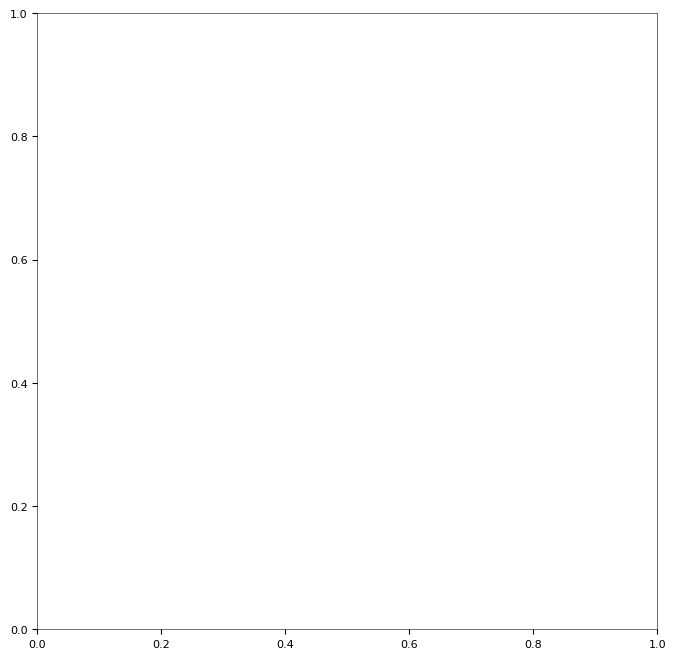

In [19]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

In [20]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query       0
Response    0
dtype: int64

In [21]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

Query
what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: count, Length: 3510, dtype: int64

##DATA VISUALIZATION

In [24]:
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer
Text=df['Query']
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)

     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
of course i heard that. i thought a plane had crashed into your house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it wasn't that loud.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i will blow my nose sometime for you, and you'll see.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay. i'll take your word for it.
neg: 0.0, neu: 0.759, pos: 0.241, compound: 0.2263, 
i thought you had an elephant in your house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you're funny.
neg: 0.0, neu: 0.256, pos: 0.744, compound: 0.4404, 
what did you say? i think i've gone deaf.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have lots of friends.
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
really? how many do you have?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't know, maybe one hundred.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that is a lot of friends. do you have a best friend?
neg: 0.0, neu: 0.4, pos: 0.6, compound: 0.8885,

NEG= NEGATIVE

NEU=NETURAL

Polarity scores are essentially numerical values that represent the sentiment expressed in a piece of text, ranging from positive to negative.

Other Relevant Scores to Consider:

While polarity scores are central to your project, you might consider incorporating other scores to gain a more nuanced understanding of the text:

**Subjectivity Scores**: These scores indicate the degree to which a text expresses personal opinions or feelings rather than objective facts. They can help differentiate between factual statements and opinions, adding another layer to sentiment analysis.

**Emotion Scores:** Some sentiment analysis tools can identify specific emotions like joy, sadness, anger, or fear. These scores provide a more granular view of the emotions expressed in the text, going beyond the simple positive/negative dichotomy.

**Intensity Scores:** These scores measure the strength or intensity of the sentiment expressed. For example, a highly intense negative sentiment might indicate a more serious customer complaint than a mildly negative sentiment.

**Aspect-Based Sentiment Analysis (ABSA):** ABSA focuses on identifying the sentiment expressed towards specific aspects or features of a product or service. This can provide valuable insights into what customers like or dislike about specific aspects of your offerings.

##REASON WHY WE USE POLARITY SCORES
Whether to use these other scores depends on the specific goals and requirements of your project. If you need a more detailed understanding of emotions or specific aspects of customer feedback, exploring these additional scores can be valuable. However, for the core task of understanding overall sentiment, polarity scores remain the primary focus and provide a solid foundation for your analysis.

In [25]:
df

Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response    neg    neu    pos  \
0                         i'm fine. how about yourself?  0.000  1.000  0.000   
1                   i'm pretty good. thanks for asking.  0.000  0.690  0.310   
2                     no problem. so how have you been?  0.000  0.250  0.750   
3                      i've been great. what about you?  0.495  0.505  0.000   
4              i've been good. i'm in school right now.  0.000  0.549  0.451   
...                                                 ...    ...    ...    ...   
3720                              are you right-handed?  0.000  0.707  0.293   
3721                                  yes. all my life.  0.000  1.000  0.000   
3722  you're wearing out your right hand. stop using...  0.000  0.526  0.474   
3723        but i do all my writing with my right hand.  0.153  0.625  0.222   
3724  start typing instead. that way your left hand ...  0.000  0.650  0.350   

      compound  
0       0.0000  
1       0.2023  
2       0.8402  
3      -0.5994  
4       0.6249  
...        ...  
3720    0.4404  
3721    0.0000  
3722    0.4019  
3723    0.2500  
3724    0.6486  

[3725 rows x 6 columns]

from matplotlib import pyplot as plt
df['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['neu'].plot(kind='hist', bins=20, title='neu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pos'].plot(kind='hist', bins=20, title='pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['compound'].plot(kind='hist', bins=20, title='compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='neg', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='neu', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pos', y='compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['neu'].plot(kind='line', figsize=(8, 4), title='neu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pos'].plot(kind='line', figsize=(8, 4), title='pos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['compound'].plot(kind='line', figsize=(8, 4), title='compound')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
from wordcloud import WordCloud
# importing word cloud
def wordcloud(df, label):

    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="blue",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud

why random state?

many algorithms involve randomness or random processes. For example, splitting data into training and testing sets, initializing model parameters, or shuffling data during training can involve random choices. The random_state parameter allows you to control this randomness by providing a seed value to the random number generator.

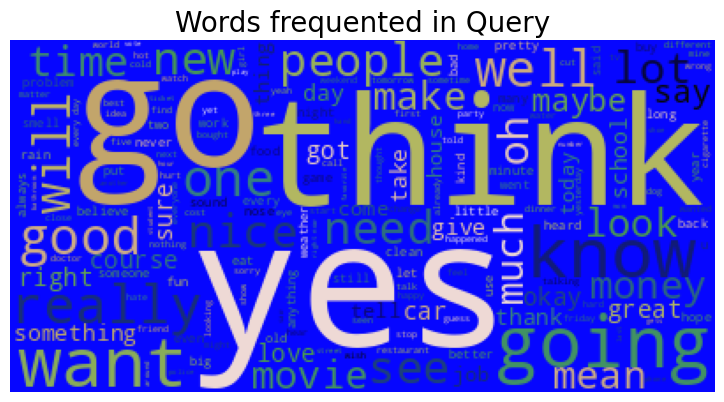

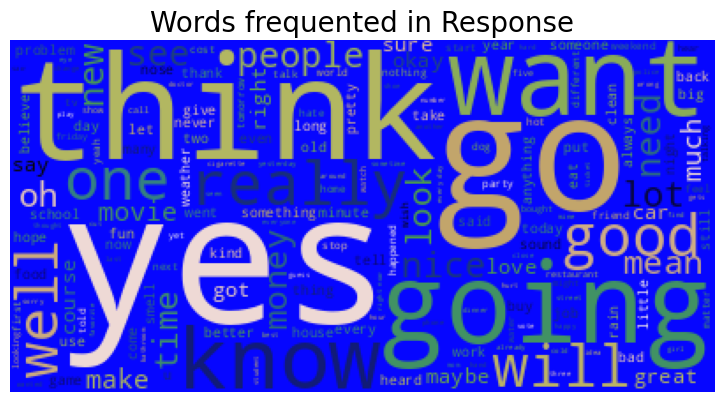

In [29]:
wordcloud(df,'Query')
# top words in the query column
wordcloud(df,'Response')
# top words in the response column
# Removing special characters

##TEXT-NORMALIZATION

In [30]:
import re
# importing regular expressions
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column
df
# final cleaned dataset

Query  \
0                                hi  how are you doing    
1                         i m fine  how about yourself    
2                   i m pretty good  thanks for asking    
3                     no problem  so how have you been    
4                      i ve been great  what about you    
...                                                 ...   
3720    that s a good question  maybe it s not old age    
3721                              are you right handed    
3722                                  yes  all my life    
3723  you re wearing out your right hand  stop using...   
3724        but i do all my writing with my right hand    

                                               Response    neg    neu    pos  \
0                         i m fine  how about yourself   0.000  1.000  0.000   
1                   i m pretty good  thanks for asking   0.000  0.690  0.310   
2                     no problem  so how have you been   0.000  0.250  0.750   
3                      i ve been great  what about you   0.495  0.505  0.000   
4              i ve been good  i m in school right now   0.000  0.549  0.451   
...                                                 ...    ...    ...    ...   
3720                              are you right handed   0.000  0.707  0.293   
3721                                  yes  all my life   0.000  1.000  0.000   
3722  you re wearing out your right hand  stop using...  0.000  0.526  0.474   
3723        but i do all my writing with my right hand   0.153  0.625  0.222   
3724  start typing instead  that way your left hand ...  0.000  0.650  0.350   

      compound  
0       0.0000  
1       0.2023  
2       0.8402  
3      -0.5994  
4       0.6249  
...        ...  
3720    0.4404  
3721    0.0000  
3722    0.4019  
3723    0.2500  
3724    0.6486  

[3725 rows x 6 columns]

from matplotlib import pyplot as plt
df['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['neu'].plot(kind='hist', bins=20, title='neu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pos'].plot(kind='hist', bins=20, title='pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['compound'].plot(kind='hist', bins=20, title='compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='neg', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='neu', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pos', y='compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['neu'].plot(kind='line', figsize=(8, 4), title='neu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pos'].plot(kind='line', figsize=(8, 4), title='pos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['compound'].plot(kind='line', figsize=(8, 4), title='compound')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [32]:
df

Query  \
0                                hi  how are you doing    
1                         i m fine  how about yourself    
2                   i m pretty good  thanks for asking    
3                     no problem  so how have you been    
4                      i ve been great  what about you    
5              i ve been good  i m in school right now    
6                             what school do you go to    
7                                          i go to pcc    
8                                 do you like it there    
9                  it s okay  it s a really big campus    
10                               good luck with school    
11                                      how s it going    
12                       i m doing well  how about you    
13                                never better  thanks    
14                         so how have you been lately    
15                 i ve actually been pretty good  you    
16                    i m actually in school right now    
17                          which school do you attend    
18                         i m attending pcc right now    
19                           are you enjoying it there    
20       it s not bad  there are a lot of people there    
21                                 good luck with that    
22                             how are you doing today    
23                     i m doing great  what about you    
24                    i m absolutely lovely  thank you    
25                     everything s been good with you    
26           i haven t been better  how about yourself    
27                           i started school recently    
28                       where are you going to school    
29                                    i m going to pcc    
30                           how do you like it so far    
31    i like it so far  my classes are pretty good r...   
32                              it s an ugly day today    
33                         i know  i think it may rain    
34    it s the middle of summer  it shouldn t rain t...   
35                                 that would be weird    
36    yeah  especially since it s ninety degrees out...   
37    i know  it would be horrible if it rained and ...   
38                                   yes  it would be     
39           i really wish it wasn t so hot every day     
40                   me too  i can t wait until winter    
41    i like winter too  but sometimes it gets too c...   
42                         i d rather be cold than hot    
43             it doesn t look very nice outside today    
44      you re right  i think it s going to rain later    
45    in the middle of the summer  it shouldn t be r...   
46                            that wouldn t seem right    
47    considering that it s over ninety degrees outs...   
48    exactly  it wouldn t be nice if it started rai...   
49                     i know  you re absolutely right    
50                    i wish it would cool off one day    
51       that s how i feel  i want winter to come soon    
52    i enjoy the winter  but it gets really cold so...   
53    i know what you mean  but i d rather be cold t...   
54                     i wish it was a nicer day today    
55                that is true  i hope it doesn t rain    
56        it wouldn t rain in the middle of the summer    
57    it wouldn t seem right if it started raining r...   
58    it would be weird if it started raining in nin...   
59               any rain right now would be pointless    
60                    that s right  it really would be    
61                         i want it to cool down some    
62    i know what you mean  i can t wait until it s ...   
63    winter is great  i wish it didn t get so cold ...   
64                                it s such a nice day    
65                                          yes  it is    
66                      it looks like it may rain soon    
67                        yes  and i h

##important sentances

In [33]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence.
imp_sent.head(5)
# printing the first 5 rows
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.
pos_sent.head(5)
# printing the first 5 rows
##negativve
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.
neg_sent.head(5)
# printing the first 5 rows
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.
neu_sent.head(5)
# printing the first 5 rows

Query  \
0                         hi  how are you doing    
3050                we get hamburgers and steak    
1596                            what is gravity    
1597  it s the force that pulls everything down    
1598                         i don t understand    

                                               Response  neg  neu  pos  \
0                         i m fine  how about yourself   0.0  1.0  0.0   
3050                           oh  that s so delicious   0.0  1.0  0.0   
1596         it s the force that pulls everything down   0.0  1.0  0.0   
1597                                i don t understand   0.0  1.0  0.0   
1598  if you pour water into a glass  the water goes...  0.0  1.0  0.0   

      compound  
0          0.0  
3050       0.0  
1596       0.0  
1597       0.0  
1598       0.0

##application

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array
tfidf.get_feature_names_out() # Use get_feature_names_out() instead of get_feature_names()
# displaying feature names

array(['able', 'about', 'absolutely', ..., 'yy', 'zip', 'zoo'],
      dtype=object)

In [42]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [43]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


def lemmatization_sentence(sentence):
    """
    Lemmatizes a sentence using NLTK's WordNetLemmatizer.

    Args:
        sentence (str): The sentence to lemmatize.

    Returns:
        str: The lemmatized sentence.
    """
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

from sklearn.metrics.pairwise import cosine_distances
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = lemmatization_sentence(query) #Use the custom function
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict
while True:
    query = input('USER: ')
    if query == 'exit':
        break

    response = chatbot(query)
    if response['score'] <= 0.2: #
        print('BOT: Please rephrase your Question.')

    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


USER: hi
logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 68.06 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i m fine  how about yourself 
USER: who 
logs:
 Matched Question: 'who '
 Confidence Score: 100.00 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  two students from usc 
USER: bye
BOT: Please rephrase your Question.
USER: end
logs:
 Matched Question: 'let s find a house that s at the end of a dead end '
 Confidence Score: 69.74 
 PositiveScore: 0.0 
 NegativeScore: 0.323
 NeutralScore: 0.677
BOT:  that s perfect  the less traffic  the better 
USER: exit
